In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Binance Official Wallet (Hot Wallet)
WALLET_ADDRESS = "0x28C6c06298d514Db089934071355E5743bf21d60"  # You can change this to another Binance wallet
ETHERSCAN_API_KEY = "SAFQS5H9P2ZFTW9957KW85UFN4J167B3ZK"  # Replace with your Etherscan API key


In [3]:

# Step 1: Fetch Transaction Data from Etherscan
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={WALLET_ADDRESS}&startblock=0&endblock=99999999&sort=asc&apikey={ETHERSCAN_API_KEY}"
response = requests.get(url)
data = response.json()


In [4]:

# Step 2: Convert Data to DataFrame
if data["status"] == "1" and len(data["result"]) > 0:
    df = pd.DataFrame(data["result"])
    print(" Transactions Fetched Successfully!")
else:
    print(" No transactions found. Check API key or wallet address.")
    exit()

# Step 3: Clean and Format Data
df["value"] = df["value"].astype(float) / 1e18  # Convert Wei to ETH
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit="s")  # Convert UNIX timestamp
df["gasUsed"] = df["gasUsed"].astype(float)  # Convert gas used to float
df = df[["timeStamp", "from", "to", "value", "gasUsed"]]  # Keep necessary columns


 Transactions Fetched Successfully!


C:\Users\jojee\AppData\Local\Temp\ipykernel_20904\510725641.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit="s")  # Convert UNIX timestamp


In [5]:

# Step 4: Total ETH Sent & Received
total_sent = df[df["from"].str.lower() == WALLET_ADDRESS.lower()]["value"].sum()
total_received = df[df["to"].str.lower() == WALLET_ADDRESS.lower()]["value"].sum()
print(f"🔹 Total ETH Sent: {total_sent:.6f} ETH")
print(f"🔹 Total ETH Received: {total_received:.6f} ETH")



🔹 Total ETH Sent: 0.000000 ETH
🔹 Total ETH Received: 111.000000 ETH


In [6]:
#  Step 5: Find Top Wallets Interacting with Binance
top_senders = df[df["to"].str.lower() == WALLET_ADDRESS.lower()]["from"].value_counts().head(10)
top_receivers = df[df["from"].str.lower() == WALLET_ADDRESS.lower()]["to"].value_counts().head(10)

print("\n Top 10 Wallets That Sent ETH to Binance:")
print(top_senders)
print("\n Top 10 Wallets That Received ETH from Binance:")
print(top_receivers)




 Top 10 Wallets That Sent ETH to Binance:
from
0xf977814e90da44bfa03b6295a0616a897441acec    2
0x00799bbc833d5b168f0410312d2a8fd9e0e3079c    1
Name: count, dtype: int64

 Top 10 Wallets That Received ETH from Binance:
to
0x607f4c5bb672230e8672085532f7e901544a7375    1238
0x514910771af9ca656af840dff83e8264ecf986ca    1177
0x4e15361fd6b4bb609fa63c81a2be19d873717870    1042
0x50d1c9771902476076ecfc8b2a83ad6b9355a4c9     767
0x3597bfd533a99c9aa083587b074434e61eb0a258     570
0x8762db106b2c2a0bccb3a80d1ed41273552616e8     351
0x8eb24319393716668d768dcec29356ae9cffe285     274
0x967da4048cd07ab37855c090aaf366e4ce1b9f48     258
0xd533a949740bb3306d119cc777fa900ba034cd52     223
0x4824a7b64e3966b0133f4f4ffb1b9d6beb75fff7     220
Name: count, dtype: int64


In [7]:

# Step 6: Gas Fee Analysis
high_gas_tx = df.sort_values("gasUsed", ascending=False).head(10)
avg_gas_fee = df["gasUsed"].mean()
print("\n Transactions with the Highest Gas Fees:")
print(high_gas_tx[["timeStamp", "from", "to", "value", "gasUsed"]])
print(f"\n Average Gas Used Per Transaction: {avg_gas_fee}")



 Transactions with the Highest Gas Fees:
               timeStamp                                        from  \
7129 2021-05-09 13:02:39  0x28c6c06298d514db089934071355e5743bf21d60   
7128 2021-05-09 13:02:39  0x28c6c06298d514db089934071355e5743bf21d60   
6687 2021-05-09 05:42:27  0x28c6c06298d514db089934071355e5743bf21d60   
6689 2021-05-09 05:42:27  0x28c6c06298d514db089934071355e5743bf21d60   
6461 2021-05-09 00:45:49  0x28c6c06298d514db089934071355e5743bf21d60   
9176 2021-05-10 18:24:25  0x28c6c06298d514db089934071355e5743bf21d60   
7113 2021-05-09 12:56:26  0x28c6c06298d514db089934071355e5743bf21d60   
7112 2021-05-09 12:56:26  0x28c6c06298d514db089934071355e5743bf21d60   
7703 2021-05-10 00:05:29  0x28c6c06298d514db089934071355e5743bf21d60   
5445 2021-05-08 15:22:25  0x28c6c06298d514db089934071355e5743bf21d60   

                                              to  value   gasUsed  
7129  0x607f4c5bb672230e8672085532f7e901544a7375    0.0  207128.0  
7128  0x607f4c5bb672230e86720

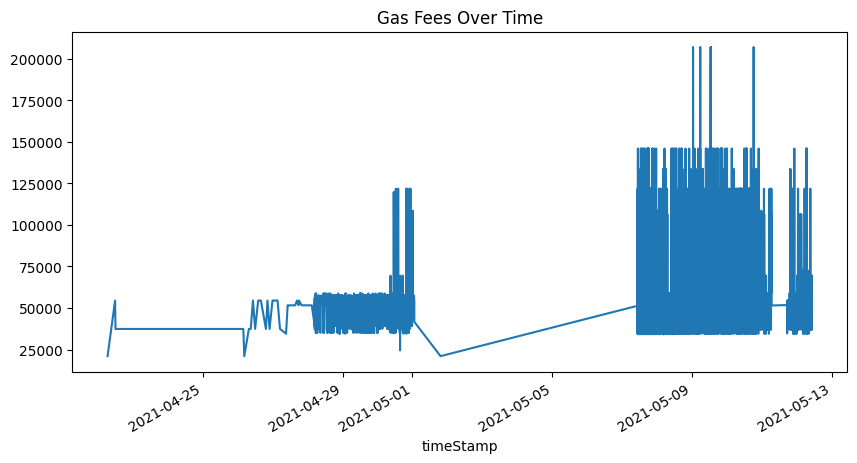

In [8]:

# Step 7: Plot Gas Fee Trends Over Time
df.set_index("timeStamp")["gasUsed"].plot(kind="line", title="Gas Fees Over Time", figsize=(10, 5))
plt.show()


In [9]:

# Step 8: Transaction Timing Analysis
df["day_of_week"] = df["timeStamp"].dt.day_name()
df["hour_of_day"] = df["timeStamp"].dt.hour
tx_per_day = df["day_of_week"].value_counts()
tx_per_hour = df["hour_of_day"].value_counts().sort_index()


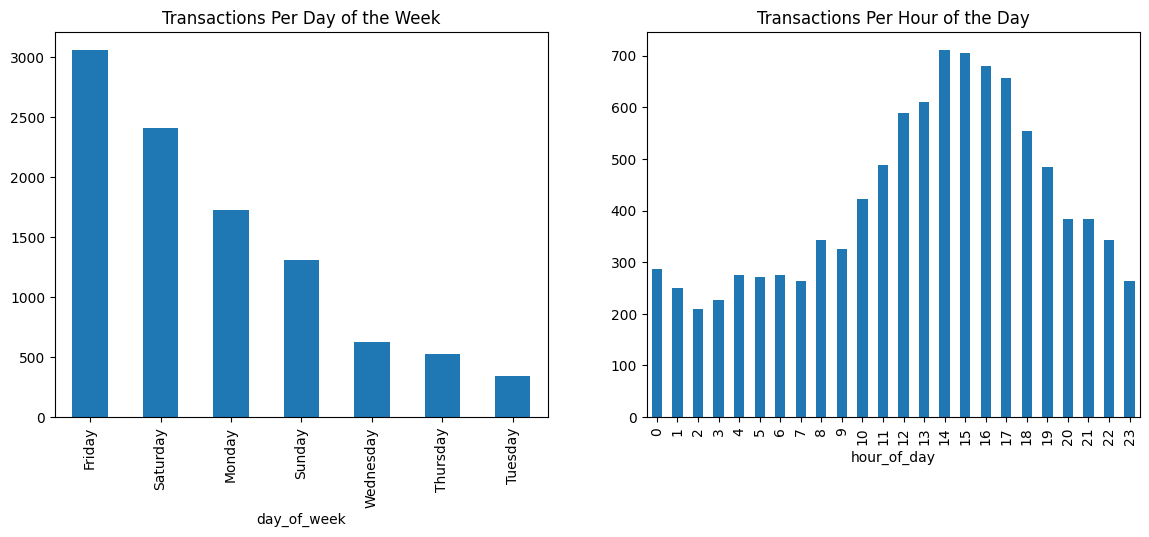

In [10]:

# Step 9: Plot Transaction Trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
tx_per_day.plot(kind="bar", ax=axes[0], title="Transactions Per Day of the Week")
tx_per_hour.plot(kind="bar", ax=axes[1], title="Transactions Per Hour of the Day")
plt.show()


In [11]:

#  Step 10: Check Stablecoin Transactions (ETH Sent to USDT, USDC, BUSD)
stablecoin_contracts = ["0xdac17f958d2ee523a2206206994597c13d831ec7",  # USDT
                        "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48",  # USDC
                        "0x4fabb145d64652a948d72533023f6e7a623c7c53"]  # BUSD
df_stablecoin_txs = df[df["to"].isin(stablecoin_contracts)]
print("\n Stablecoin Transactions (ETH Sent to USDT, USDC, BUSD):")
print(df_stablecoin_txs[["timeStamp", "to", "value"]])


 Stablecoin Transactions (ETH Sent to USDT, USDC, BUSD):
Empty DataFrame
Columns: [timeStamp, to, value]
Index: []
